In [6]:
# Imports
import numpy as np
import math
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

In [49]:
# Getting data
brent = yf.Ticker("BZ=F")
wti = yf.Ticker("CL=F")
# Training period
train_start = datetime.datetime(2020, 7, 1)
train_end = datetime.datetime(2025, 7, 31)
# Validation period
valid_start = datetime.datetime(2025, 8, 1)
valid_end = datetime.datetime(2025, 8, 31)

# Parsing the data
brent_data = brent.history(start = train_start, end = train_end)
brent_close = brent_data["Close"]

wti_data = wti.history(start = train_start, end = train_end)
wti_close = wti_data["Close"]

print(wti_close[wti_close.isna()])
print(brent_close[brent_close.isna()])

Series([], Name: Close, dtype: float64)
Series([], Name: Close, dtype: float64)


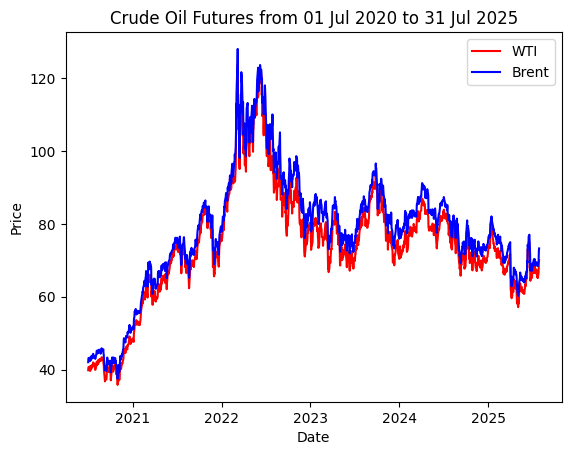

In [72]:
# Plotting Stock Price
plt.plot(wti_close, color = "red", label = "WTI")
plt.plot(brent_close, color = "blue", label = "Brent")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Crude Oil Futures from 01 Jul 2020 to 31 Jul 2025")
plt.show()
# From the plot, we can see that there's some correlation between WTI and Brent

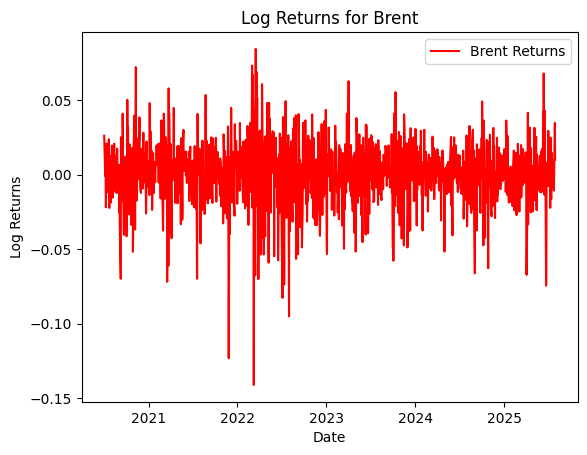

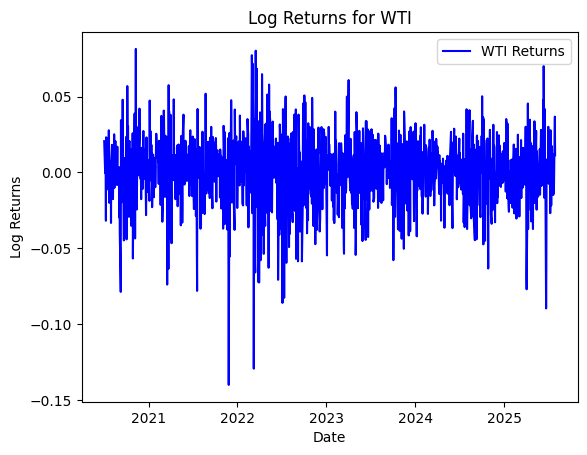

In [75]:
# We can try to track log returns on Brent
brent_log_returns = np.log(brent_close[1:] / brent_close[:-1].values)
wti_log_returns = np.log(wti_close[1:] / wti_close[:-1].values )

plt.plot(brent_log_returns, color = "red", label = "Brent Returns")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.title("Log Returns for Brent")
plt.show()

plt.plot(wti_log_returns, color = "blue", label = "WTI Returns")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Log Returns")
plt.title("Log Returns for WTI")
plt.show()


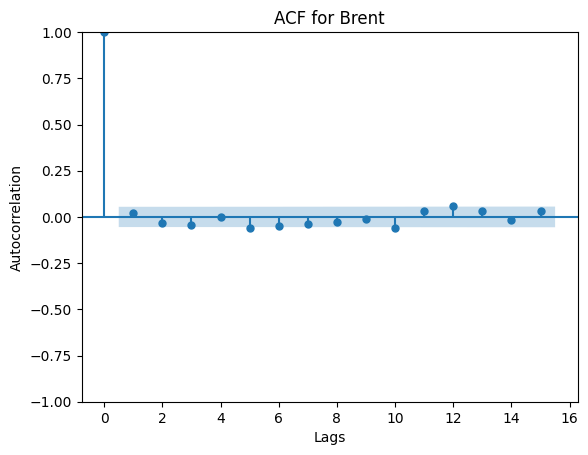

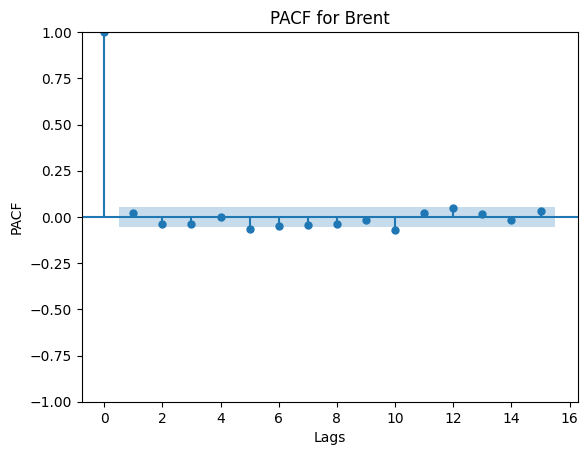

In [91]:
# We want to perform ACF / PACF tests on Brent first 
test_lag = 15
brent_acf = acf(brent_log_returns, nlags = test_lag)
plot_acf(brent_log_returns, lags = test_lag)
plt.title("ACF for Brent")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()
plot_pacf(brent_log_returns, lags = test_lag)
plt.title("PACF for Brent")
plt.xlabel("Lags")
plt.ylabel("PACF")
plt.show()

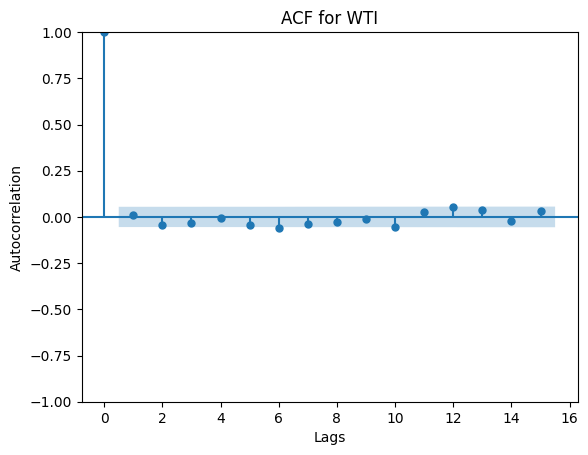

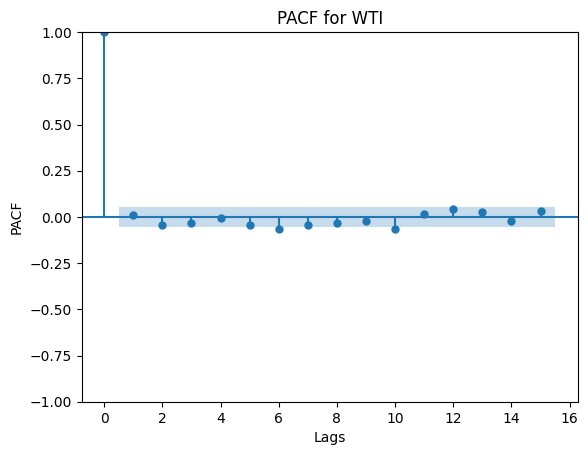

In [ ]:
# Checking WTI shows similar results where there is no significant in lag
wti_acf = acf(wti_log_returns, nlags = test_lag)
plot_acf(wti_log_returns, lags = test_lag)
plt.title("ACF for WTI")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()
plot_pacf(wti_log_returns, lags = test_lag)
plt.title("PACF for WTI")
plt.xlabel("Lags")
plt.ylabel("PACF")
plt.show()